# Two Sample T-Test - Lab

## Introduction

The two sample t-test is used to determine if two population means are equal. A common application is to test if a new process or treatment is superior to a current process or treatment.

## Objectives

You will be able to:

* Perform a two-sample t-test and make conclusions about an experiment based on the results
* Visually represent the t-test and p-value using the t-distribution

## Example: 

Consider the following experimental settings for clinical trials of a new blood pressure medicine. 

In the context of controlled experiments, you will often see talk about the "control" group and the "experimental" or "treatment" group. In a drug test example, the control group is the group given the placebo and the treatment group is given the actual drug. Researchers are interested in the average difference in blood pressure levels between the treatment and control groups.

>The 50 subjects in the control group have an average systolic blood pressure of 121.38 who have been given a placebo drug.

>The 50 subjects in the experimental / treatment group have an average systolic blood pressure of 111.56 after treatment with the drug being tested. 

The apparent difference between experimental and control groups is -9.82 points. But with 50 subjects in each group, how confident can a researcher be that this measured difference is real? You can perform a two sample t-test to evaluate this.

First, you will calculate a t-statistic for a 2-sample t-test, then calculate a p-value. 

The experimental and control observations are given below as NumPy arrays. 

First, let's make sure to import necessary libraries:

In [112]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [113]:
# Use this sample data to conduct experimentation

control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])


It is always a good idea to create a plot of the probability distributions for samples to visually inspect the differences present between mean and standard deviation. Plot both samples' distributions and inspect the overlap using `seaborn` to get an idea of how different the samples might be from one another. 

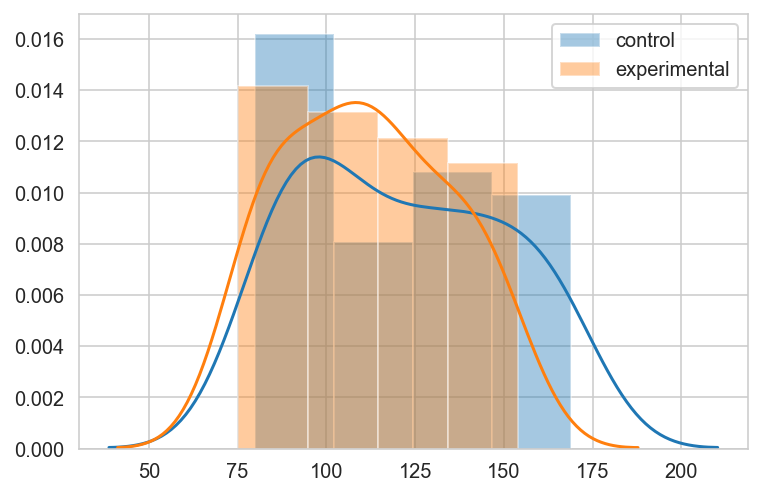

In [120]:
# Create a plot showing overlapping of distribution means and sds for inspection

sns.distplot(control, label = 'control')
sns.distplot(experimental, label = 'experimental')
plt.legend();

There are some slight differences between the mean and standard deviation of the control and experimental groups. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not. As a reminder the five steps to performing a hypothesis test are:

1) Set up null and alternative hypotheses   
2) Choose a significance level   
3) Calculate the test statistic   
4) Determine the critical or p-value (find the rejection region)   
5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis   

## The Null Hypothesis

In thus drug efficacy experiment example, you can define the null hypothesis to be that there is no difference between a subject taking a placebo and the treatment drug.

>**$H_{0}$: The mean difference between treatment and control groups is zero. i.e. $\mu_{0} = \mu_{1}$**

## The Alternate Hypothesis

In this example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups.

>**$H_{1}$ (2-tailed): The parameter of interest, our mean difference between treatment and control, is different than zero.**

>**$H_{1}$ (1-tailed, >): The parameter of interest, our mean difference between treatment and control, is greater than zero.**

>**$H_{1}$ (1-tailed, <): The parameter of interest, our mean difference between treatment and control, is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an inference about this population parameter.

Now, calculate the mean difference between both groups.

In [121]:
# -9.819999999999993
diff_mean = exp_mean - control_mean
diff_mean

-9.819999999999993

What is the probability that you would observe this data GIVEN a specified mean difference in blood pressure?

You obviously don't know the true mean difference in blood pressure resulting from administration of the drug. The whole point of conducting the experiment is to evaluate the drug. Instead, you must assume that the true mean difference is zero: the null hypothesis $H_{0}$ is assumed to be true:

## Calculating the t-statistic
When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$


## Calculating pooled sample variance
The $s^2_{p}$ denotes the sample variance. In this version of the t-test, you are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but in this case, it is a reasonable assumption.

This approach combines the variance of the two group's variance measurements into a single, pooled metric.

Now, create some functions to calculate the t-statistic. The first function to create is one that calculates the variance for a single sample.

In [126]:
def sample_variance(sample):
    mean_sample = np.mean(sample)
    
    return np.sum((sample - mean_sample) ** 2) / (len(sample)-1)

In [123]:
np.sum([(control - np.mean(control)) **2 for x in control])  / (len(control)-1)

40299.77551020408

Using `sample_variance`, you can now write another function `pooled_variance` to calculate $s_{p}^{2}$

In [127]:
def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    s1 = sample_variance(sample1)
    s2 = sample_variance(sample2)
    
    return (((n1-1) * s1) + ((n2-1)*s2)) / (n1 + n2 - 2)

Now that you have $s_{p}^{2}$, create a function `twosample_tstatistic` to calculate the two sample t-statistic using the formula given earlier. 

In [128]:
def twosample_tstatistic(expr, ctrl):
    n1 = len(expr)
    n2 = len(ctrl)
    pv = pooled_variance(expr, ctrl)
    
 
    
    return (np.mean(expr) - np.mean(ctrl)) / np.sqrt(pv * ((1/n1) + (1/n2)))
t_stat = twosample_tstatistic(experimental, control)
t_stat

# -1.8915462966190268

-1.8915462966190273

Using the data from the samples, you can now determine the critical values with the t-statistic and calculate the area under the curve to determine the p-value. 

Write a function `visualize_t` that uses matplotlib to display a standard t-distribution with vertical lines identifying each critical value that signifies the rejection region.

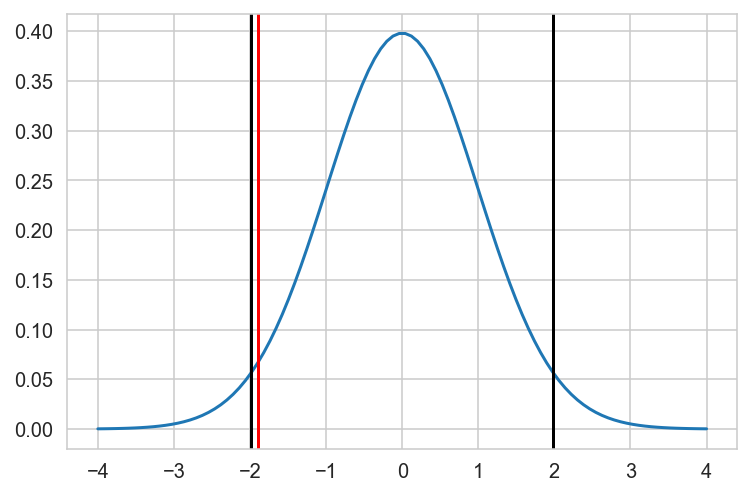

In [132]:
# Visualize t and p_value

def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig, ax = plt.subplots()

    # generate points on the x axis between -4 and 4:
    x_axis = np.linspace(-4, 4, 100 )
 
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    t_critical = stats.t.ppf(0.975, (n_control + n_experimental -2))
    
    # Draw two sided boundary for critical-t
    y_axis = stats.t.pdf(x_axis, (n_control + n_experimental -2))
    
    ax.plot(x_axis, y_axis)
    ax.axvline(t_critical, color = 'k')
    ax.axvline(-t_critical, color = 'k')
    ax.axvline(t_stat, color = 'red')
    return None

n_control = len(control)
n_experimental = len(experimental)
visualize_t(t_stat, n_control, n_experimental)

Now that you have defined your boundaries for significance, you can simply calculate the p-value by calculating the total area under curve using `stats.t.cdf()`. 

Given a t-value and the degrees of freedom, you can use the "survival function", `sf` of `scipy.stats.t` (aka the complementary CDF) to compute the one-sided p-value. For the two-sided p-value, just double the one-sided p-value.

In [133]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-1.89, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(1.89, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.061713104303855494


To verify these results, you can use SciPy's functions to calculate the p_value in a one liner. 

In [134]:
## your code here
'''
Calculates the t-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.
'''

stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.061504240672530394)

## Summary
In this lesson, you ran hypothesis testing using frequentists methods with t-values and p-values. You saw how a two sample t-test can be applied to contexts where the population and sample mean are known and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of the steps and also how to perform these functions in python. You also used built-in SciPy functions to calculate test statistics and p-value as a way to verify the manual calculations performed. 